# Testrun Stop Signals

In [1]:
import sys
from pathlib import Path

ROOT_DIR = Path().absolute().parent 

sys.path.insert(0, str(ROOT_DIR))

TEST_IMAGES_BASE = ROOT_DIR / "tests" / "images"

In [2]:
import numpy as np
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from hns.core import HNS, SignalType

train = HNS(ROOT_DIR / "configs/stable.ini")

Using TensorFlow backend.


2019-07-07 11:11:29,156 hns.HNS [INFO]: Created HNS from config /home/tuxtimo/hslu/modules/hslu-pren-fs19/configs/stable.ini
2019-07-07 11:11:29,158 hns.Camera [INFO]: Using Camera settings: resolution=320x192, rotation=180, shutter_speed=150, iso=600
2019-07-07 11:11:29,159 hns.Camera [INFO]: Initializing camera ...
2019-07-07 11:11:31,164 hns.Camera [INFO]: Camera initialized
2019-07-07 11:11:31,165 hns.SignalDetector [INFO]: Using canny settings: threshold1=120, threshold2=250, aperture size=3
2019-07-07 11:11:31,165 hns.SignalDetector [INFO]: Using box detection settings: min box size=2
2019-07-07 11:11:31,167 hns.SignalDetector [INFO]: Using start signal settings: template=templates/startsignal_v3.jpg, match confidence=0.69
2019-07-07 11:11:31,185 hns.AsyncInfosignalDetector [INFO]: Using AsyncInfosignalDetector settings: number_of_workers=1
2019-07-07 11:11:31,197 hns.DigitDetector [INFO]: Using model=/home/tuxtimo/hslu/modules/hslu-pren-fs19/hns/models/numbers.h5
2019-07-07 11:1

In [4]:
TEST_RUN_DIR = TEST_IMAGES_BASE / "track"

In [5]:
def get_frame_images(root_dir):
    def sort(path):
        return int(path.stem.split("-")[-1])
    
    for image_path in sorted((p for p in root_dir.glob("*.jpg")), key=sort):
        yield image_path

## Test STOP Signals

In [6]:
SHOW_NEGATIVES = False

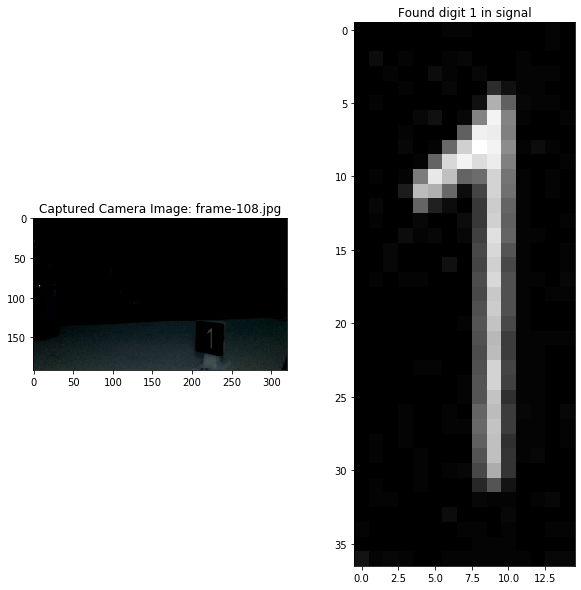

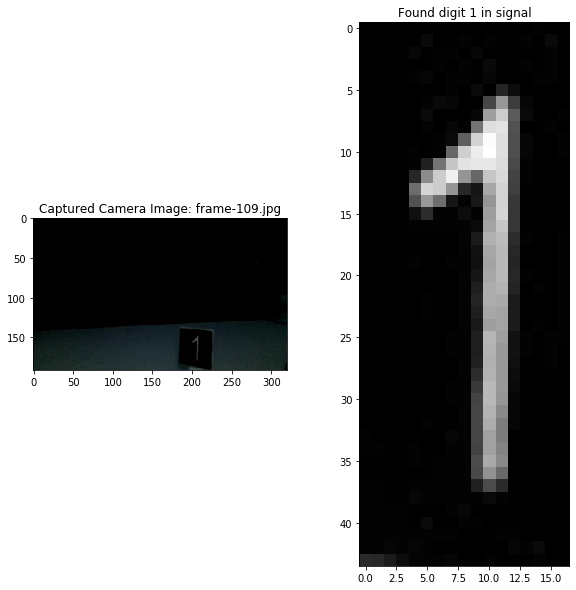

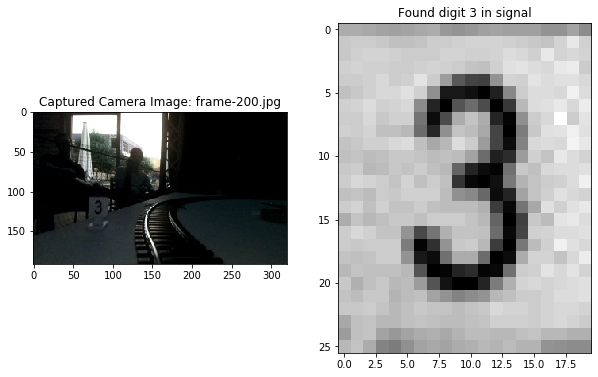

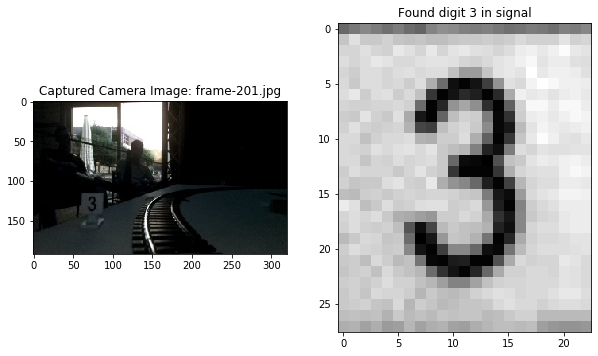

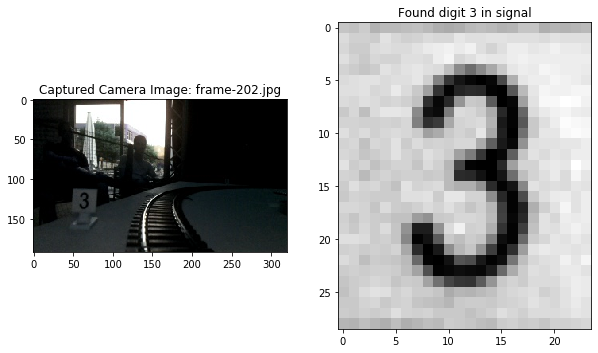

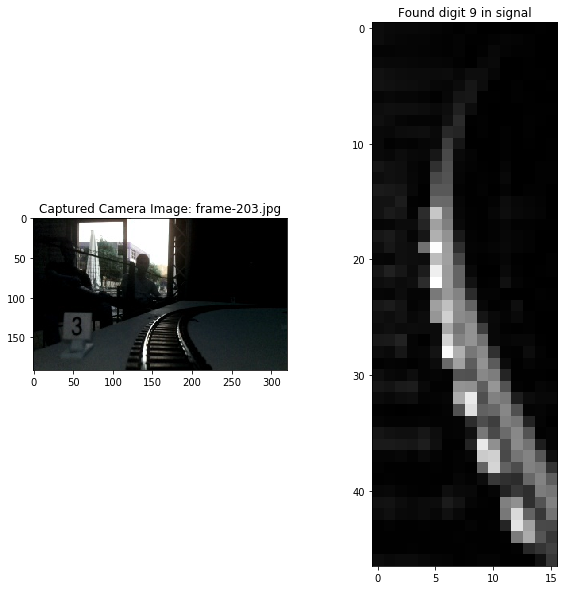

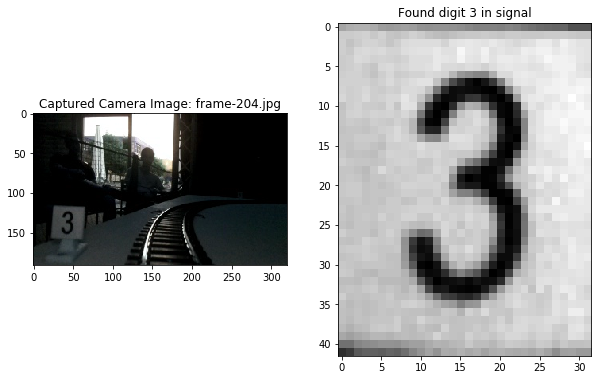

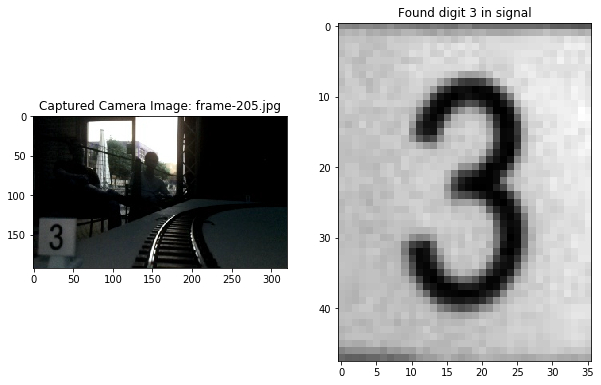

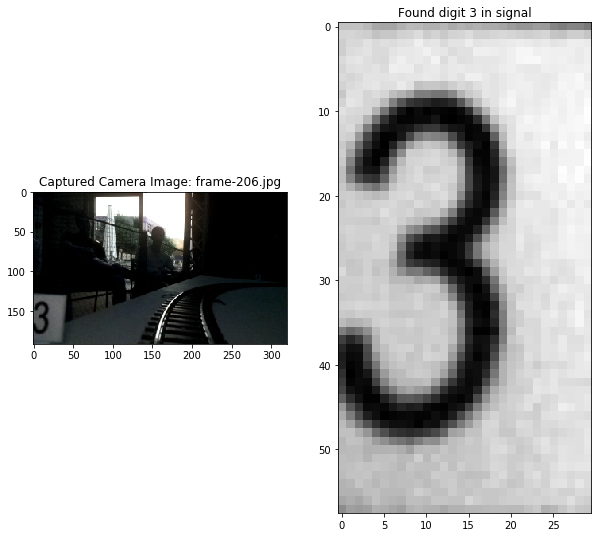

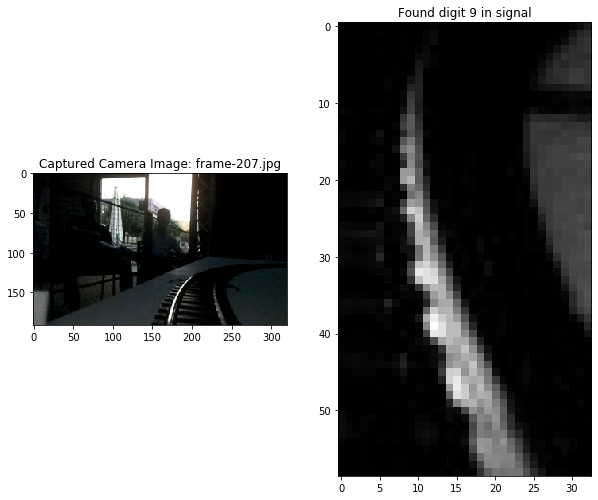

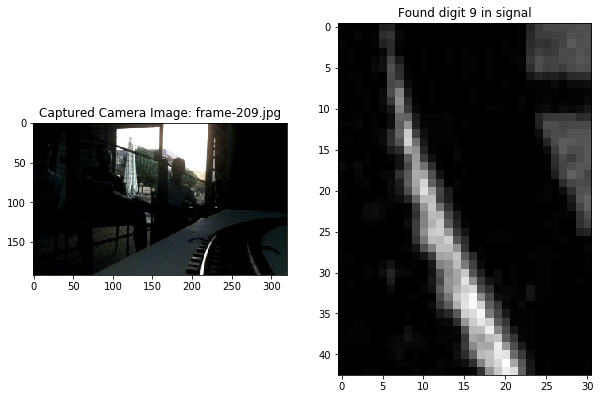

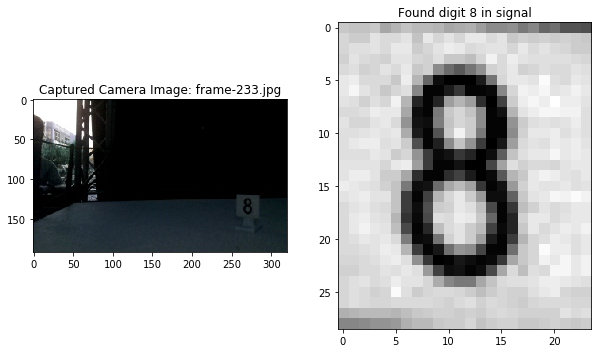

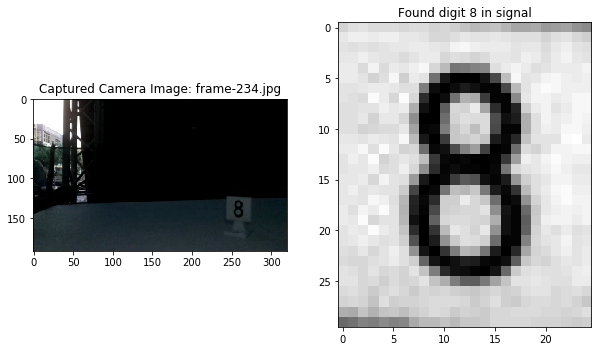

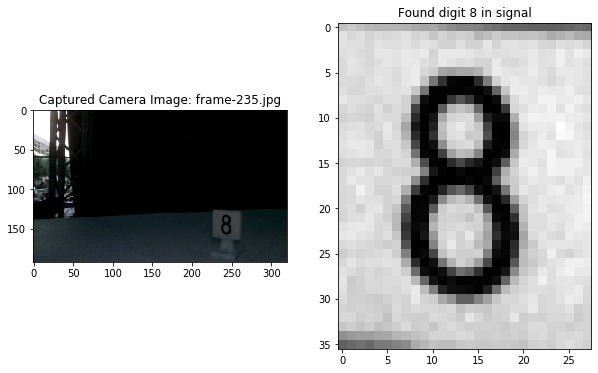

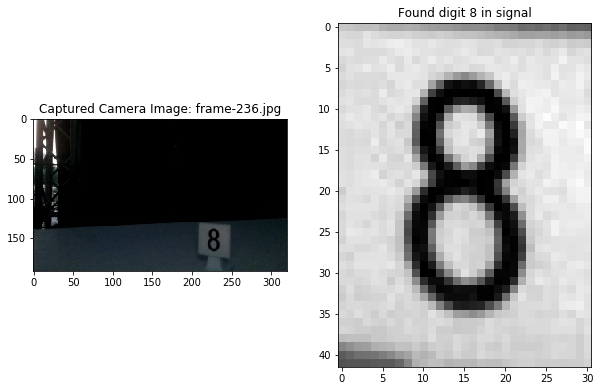

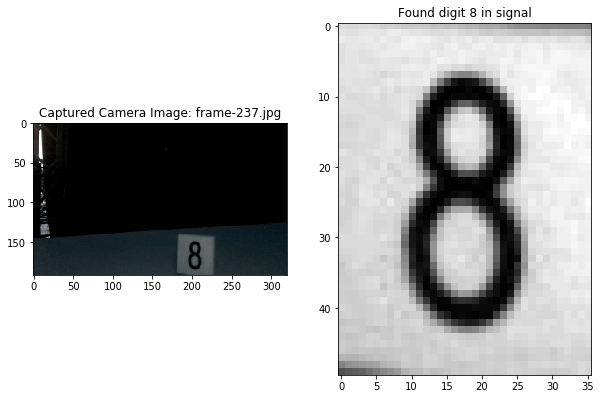

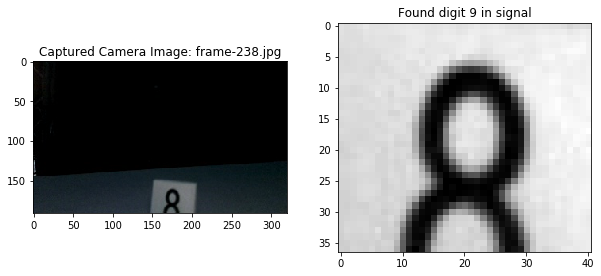

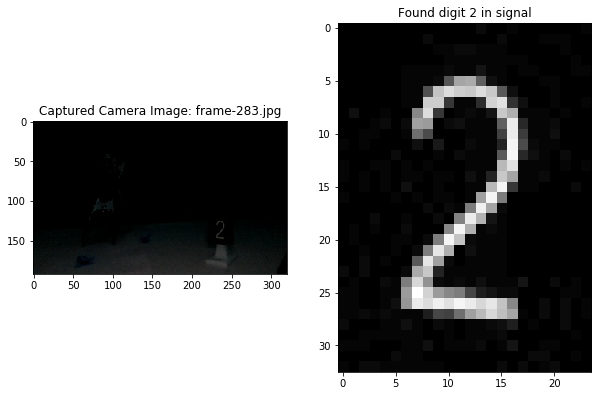

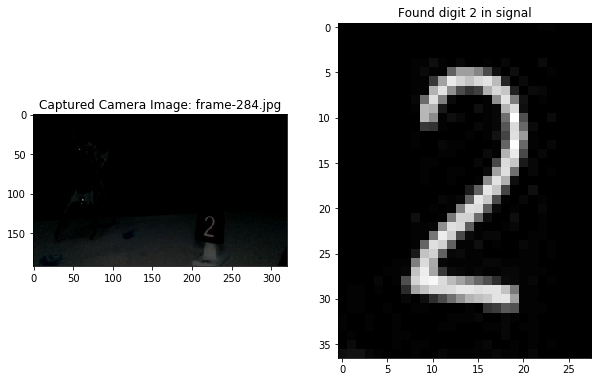

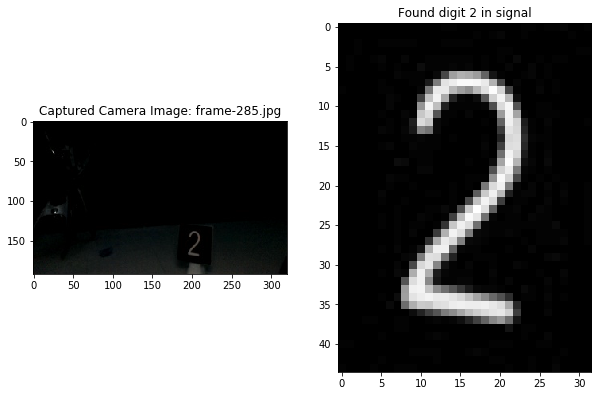

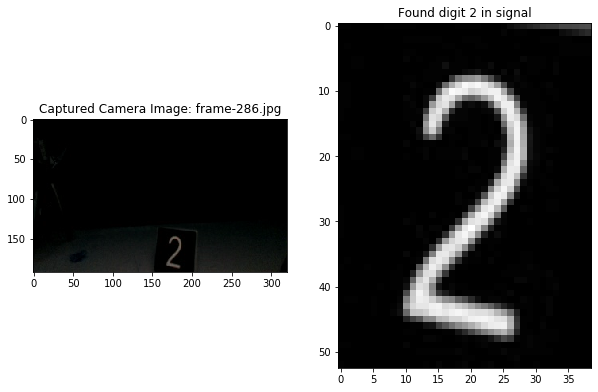

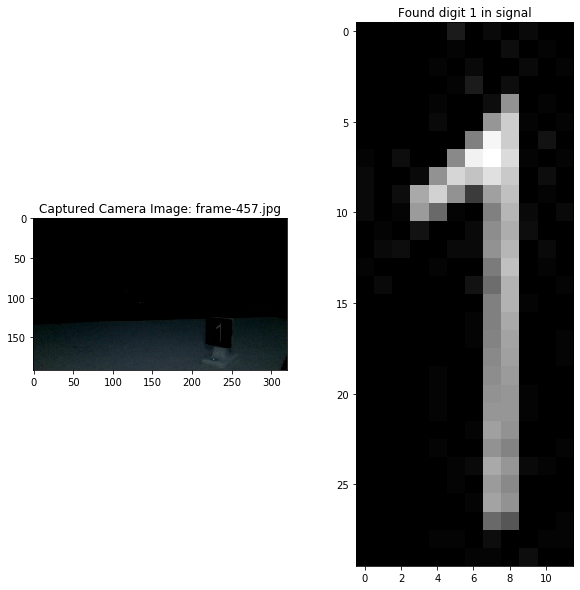

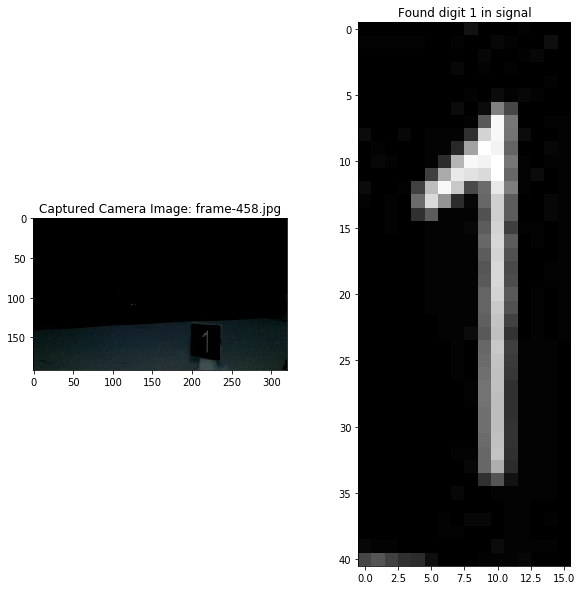

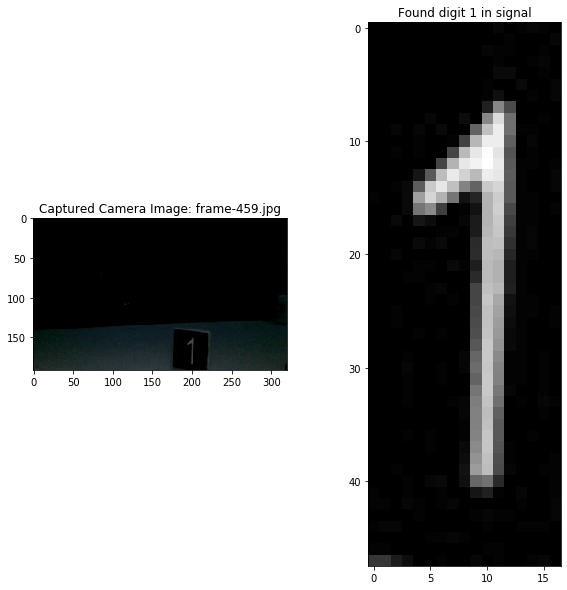

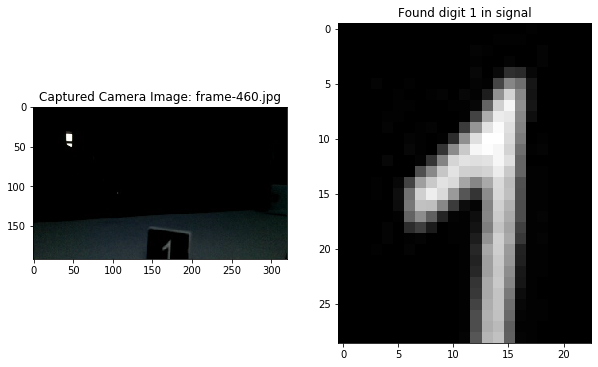

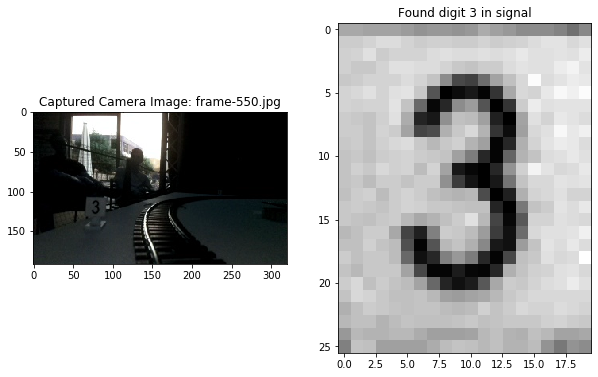

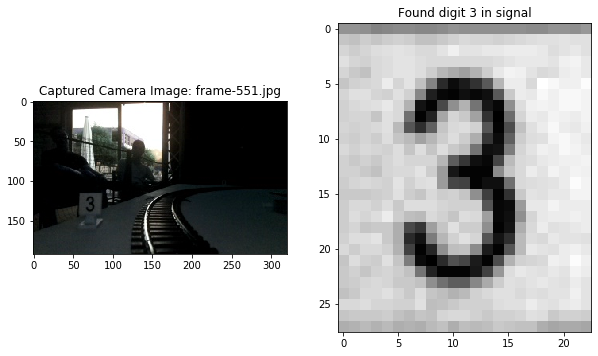

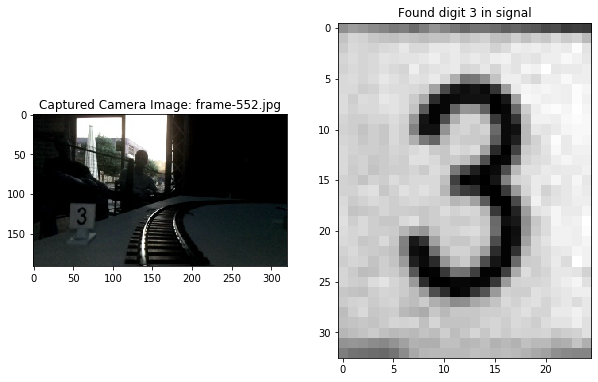

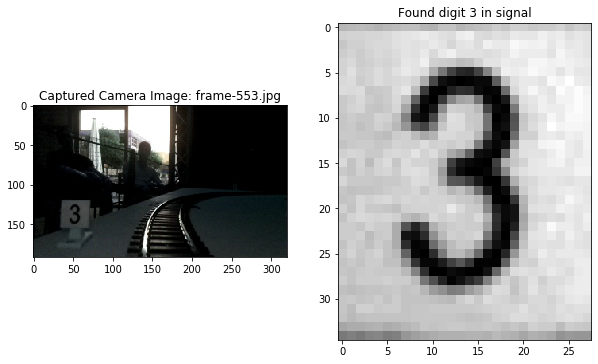

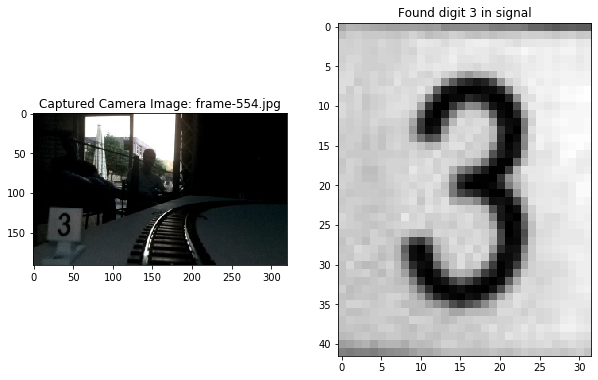

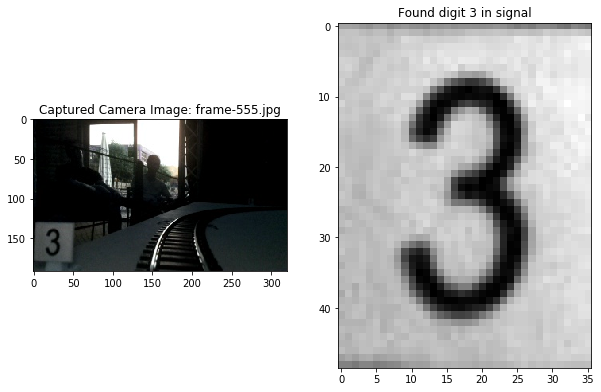

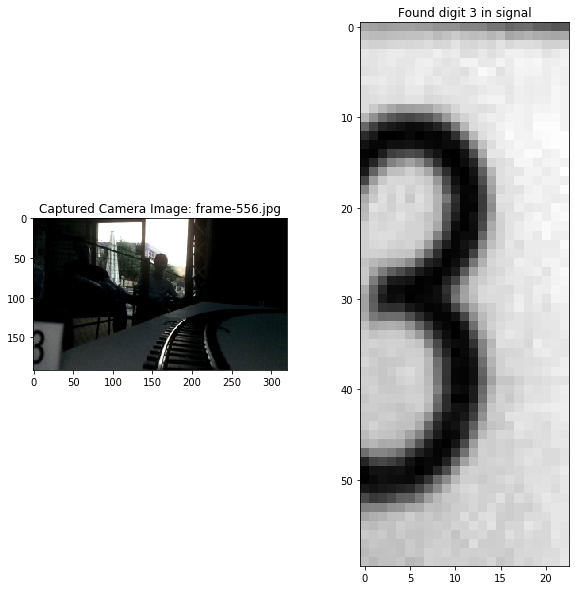

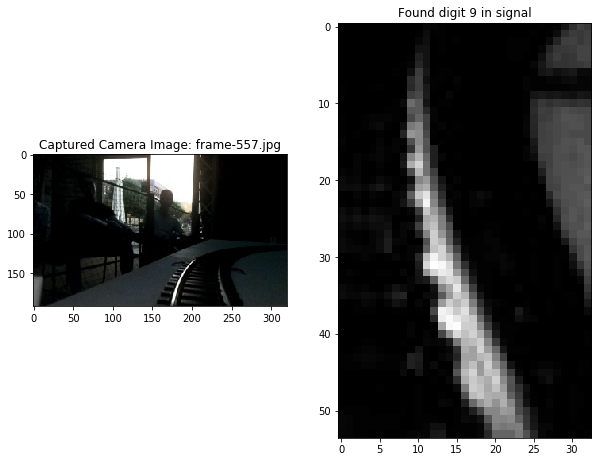

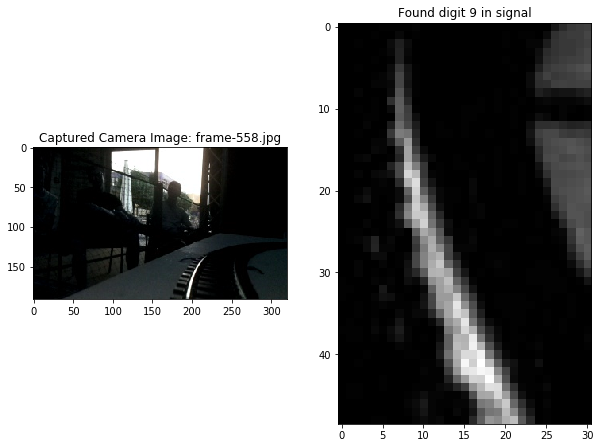

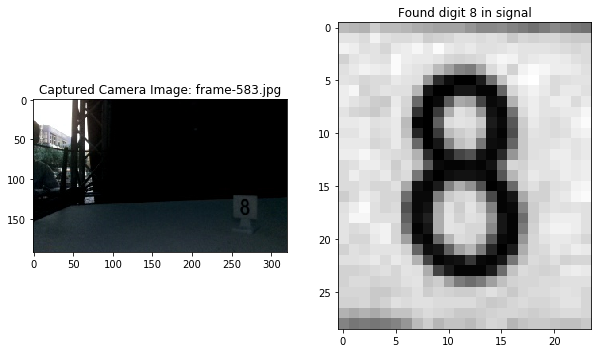

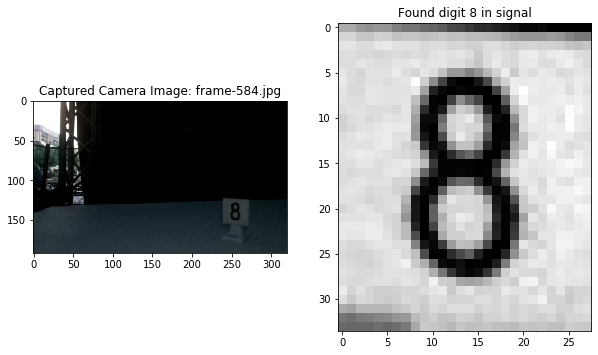

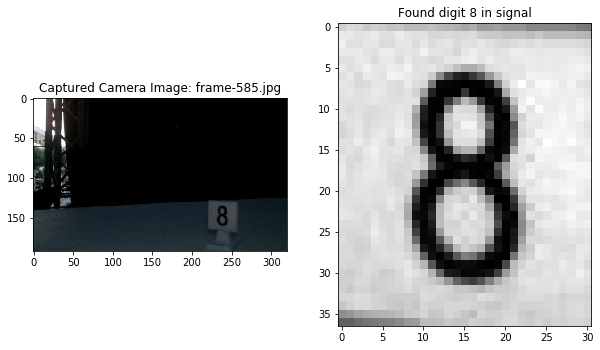

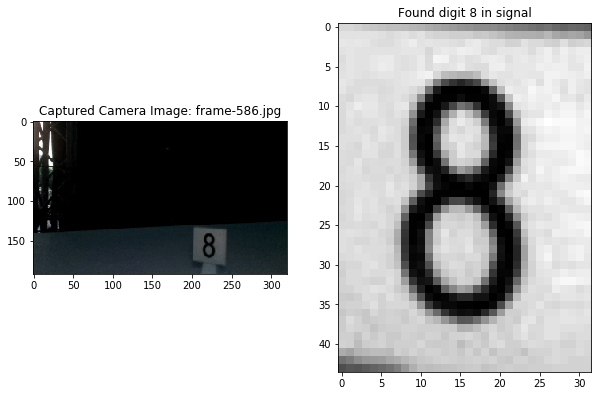

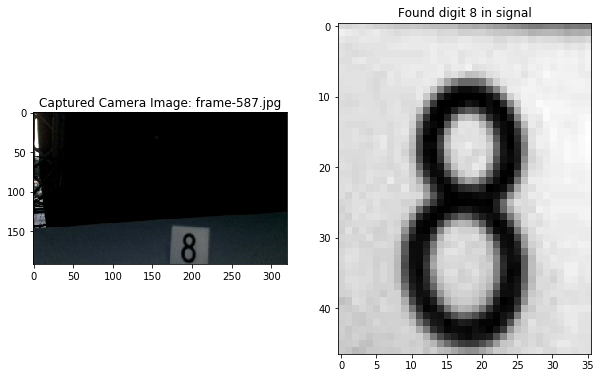

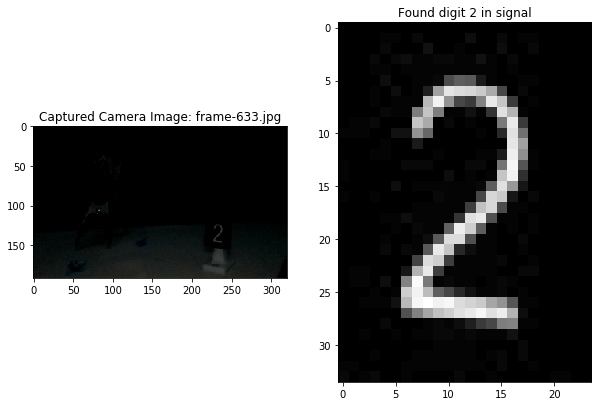

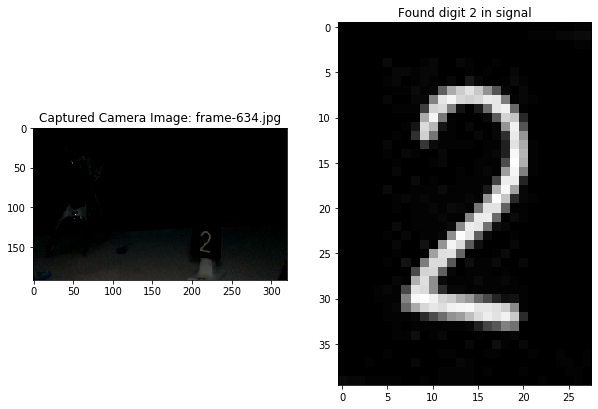

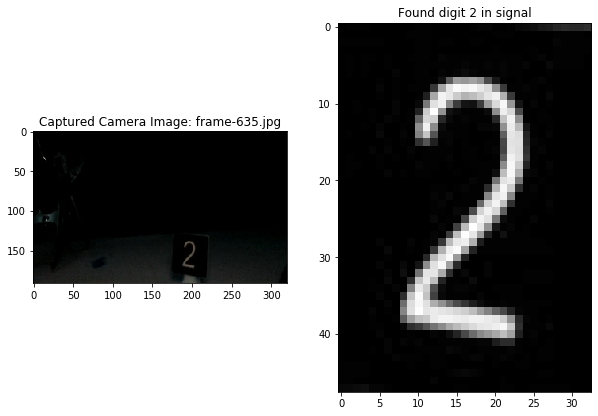

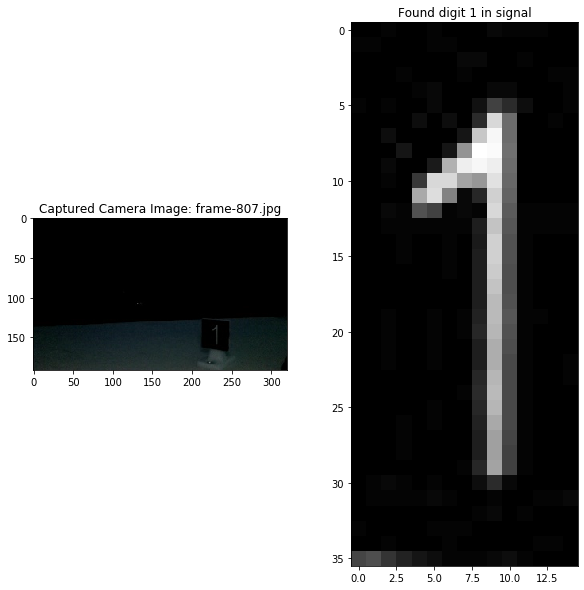

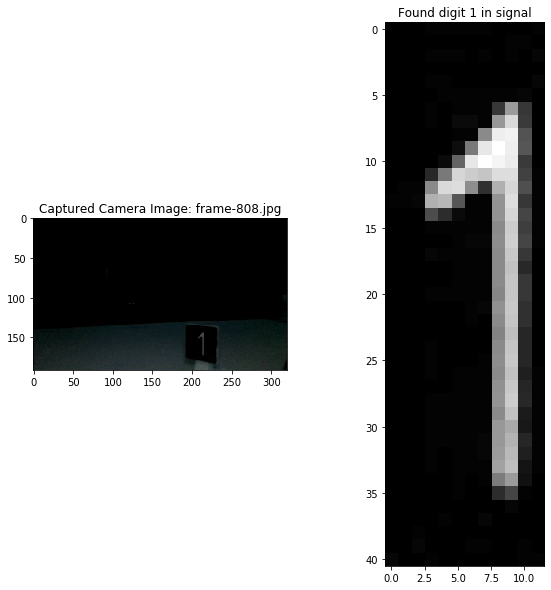

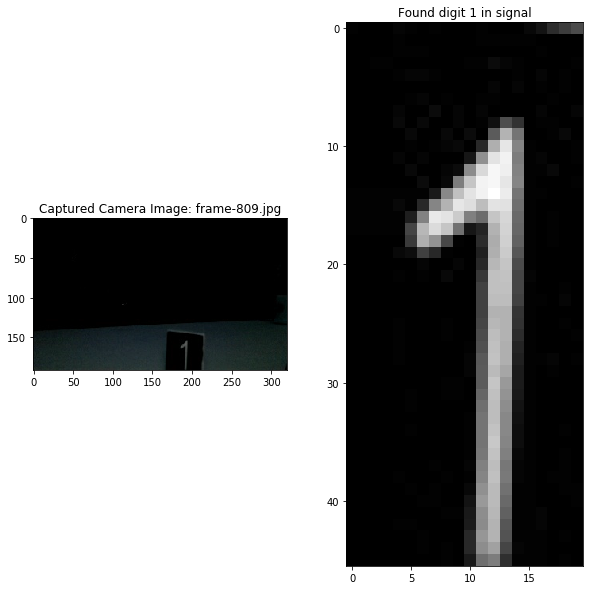

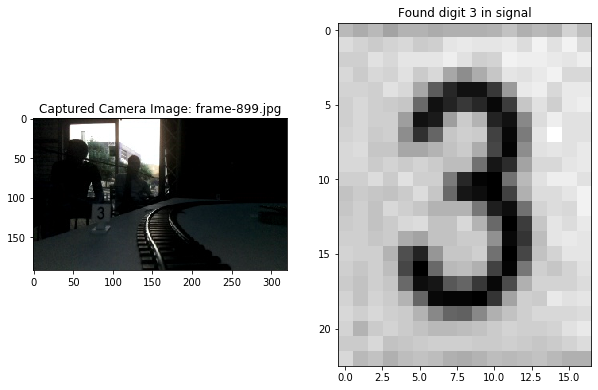

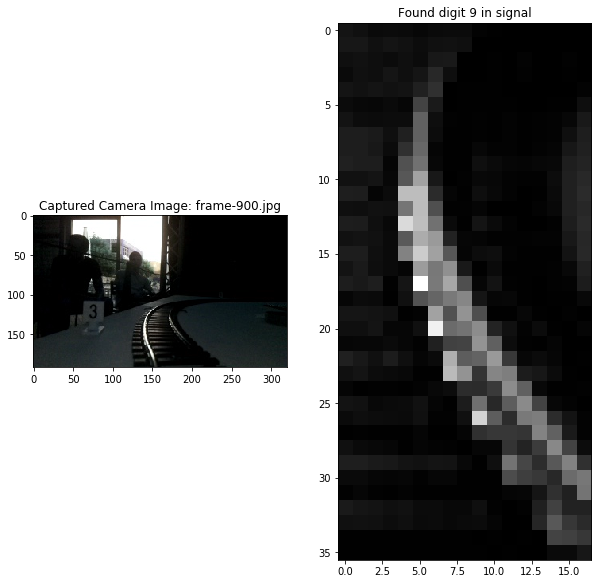

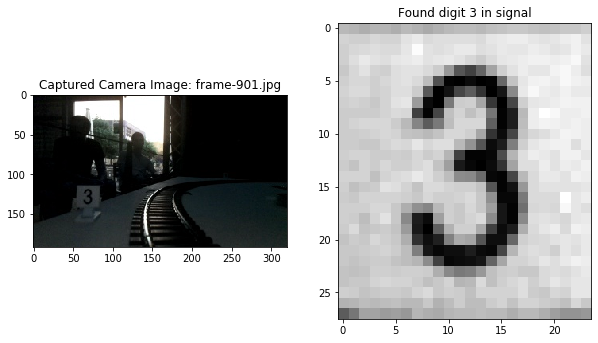

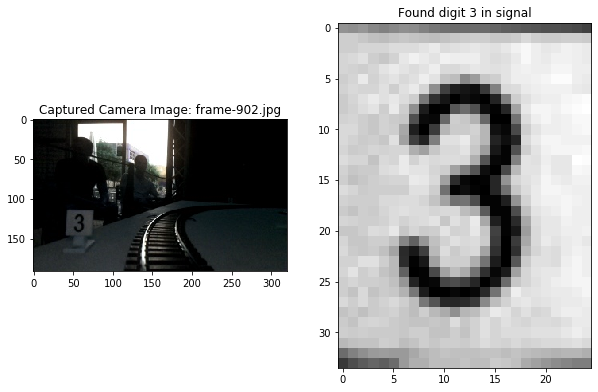

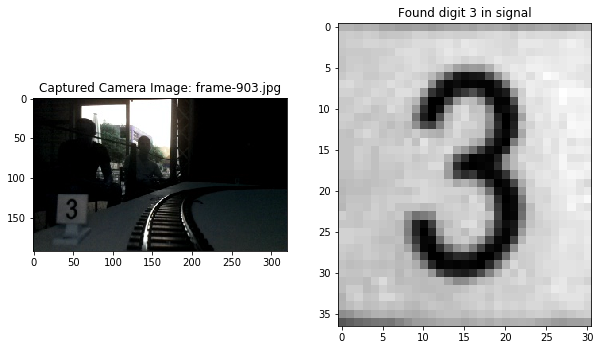

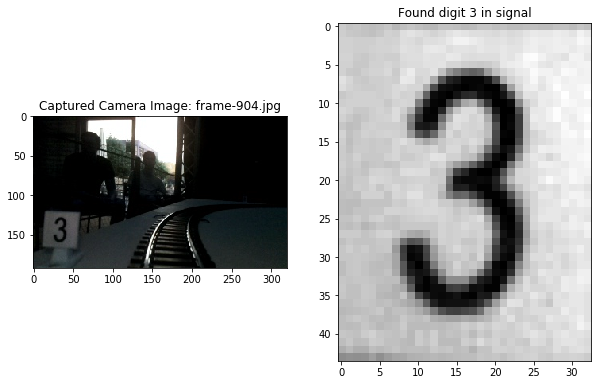

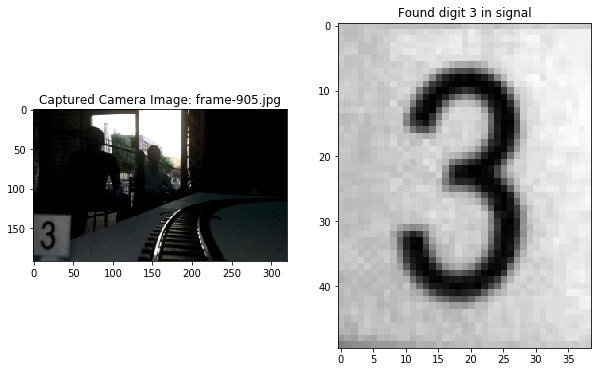

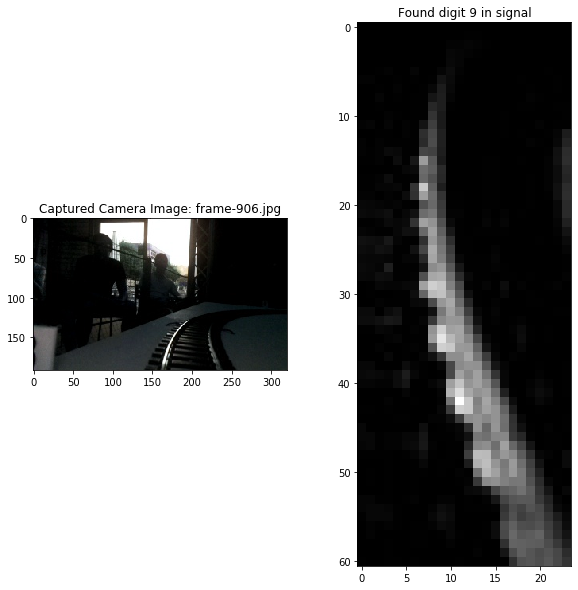

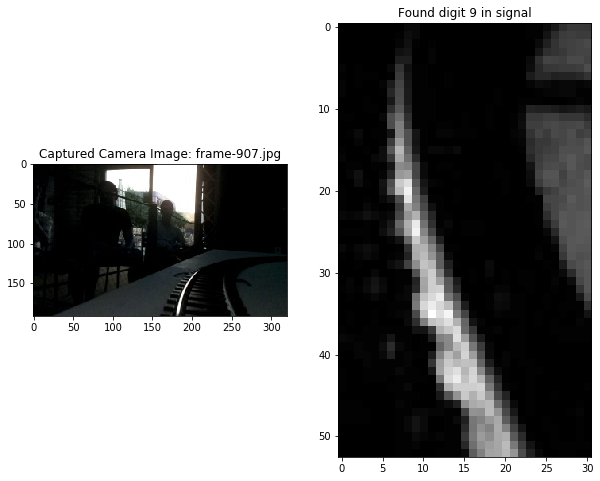

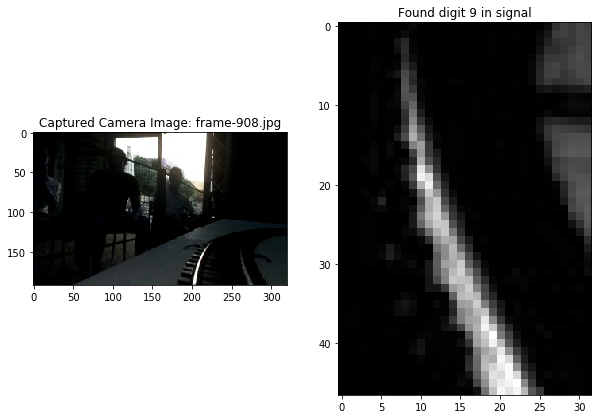

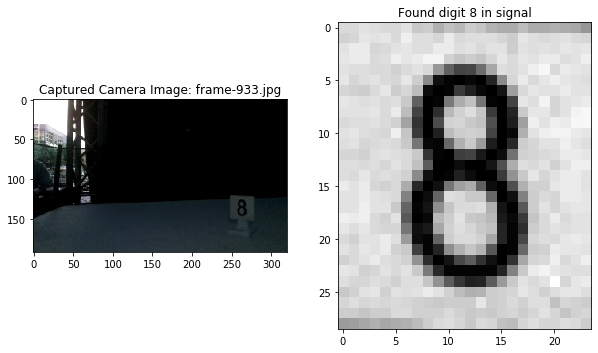

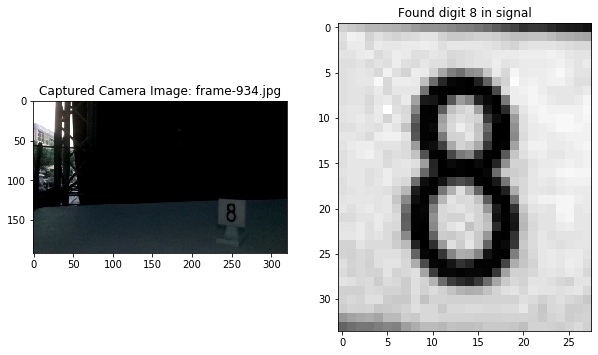

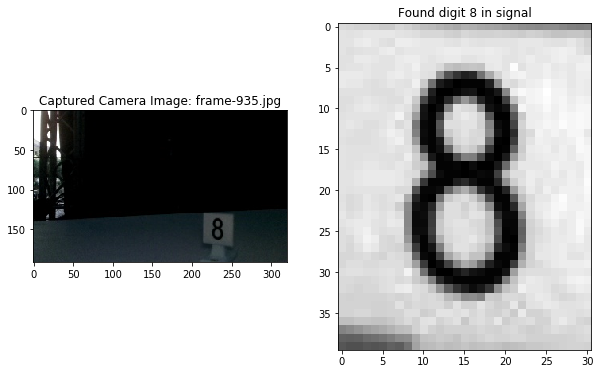

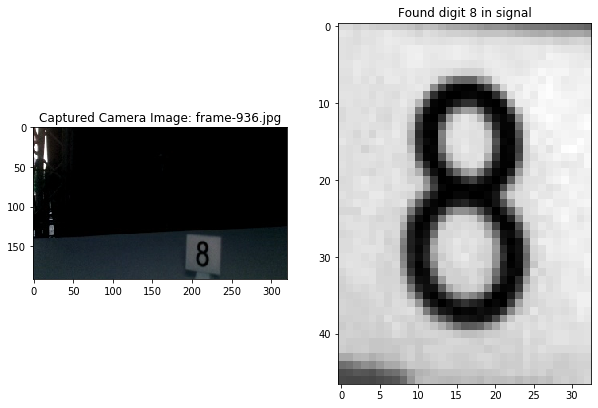

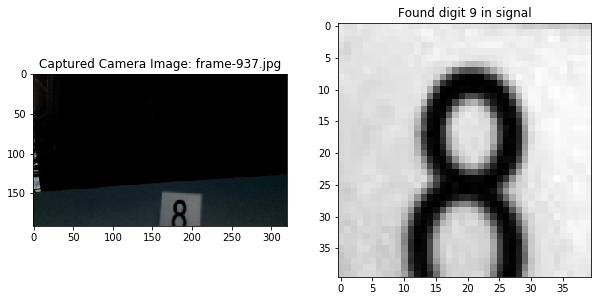

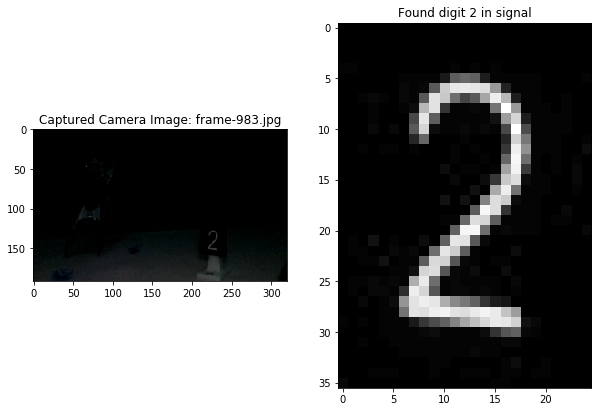

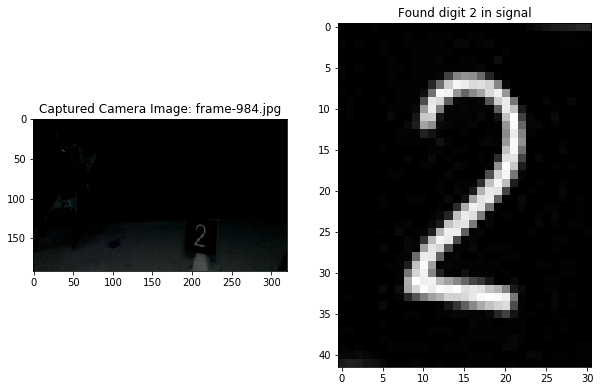

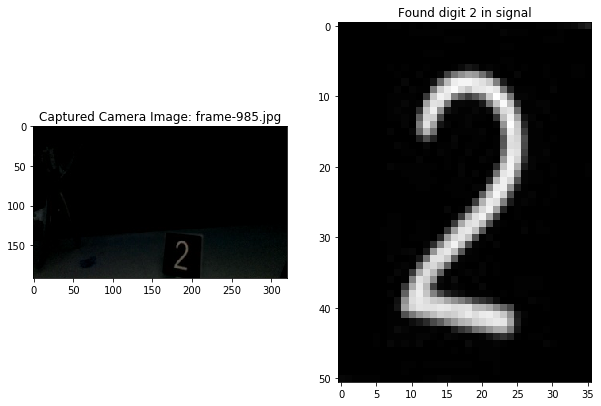

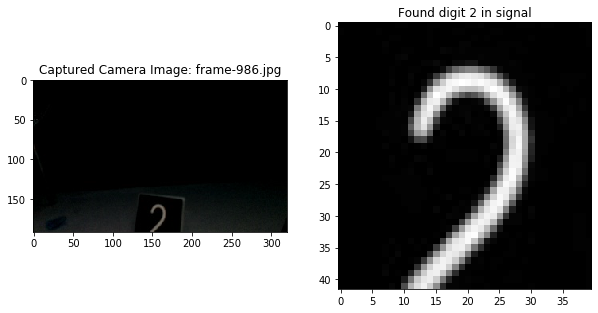

In [7]:
for image_path in get_frame_images(TEST_RUN_DIR):
    image = cv2.imread(str(image_path))
    try:
        signal = train.signal_detector.crop_and_detect(image, signal_types=[SignalType.STOP_SIGNAL])

        if signal is None:
            if SHOW_NEGATIVES:
                plt.figure(figsize=(10, 10))
                plt.title("No signal found in image: {}".format(image_path.name))
                plt.imshow(image)
                plt.show()
            continue

        digit = train.digit_detector.detect(signal.image)
        
        if digit is None and not SHOW_NEGATIVES:
            continue

        plt.figure(figsize=(10, 10))
        plt.subplot(1, 2, 1)
        plt.title("Captured Camera Image: {}".format(image_path.name))
        plt.imshow(image)
        plt.subplot(1, 2, 2)
        if digit is None:
            plt.title("No digit in signal")
        else:
            plt.title("Found digit {} in signal".format(digit))
        plt.imshow(signal.image, cmap="gray")
        plt.show()
    except Exception as exc:
        plt.figure(figsize=(10, 10))
        plt.title("Failed to detect signal in image: {}: {}".format(image_path.name, exc))
        plt.imshow(image)
        plt.show()